In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import imageio

from skimage.color import hsv2rgb, rgb2hsv

shape (375, 300, 3)


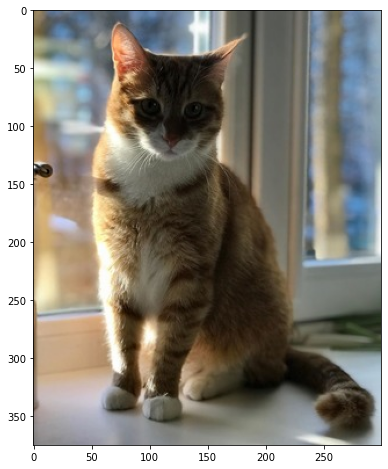

In [2]:
img = imageio.imread('cat.jpg')
img = img.astype(np.float32) / 255.
print('shape', img.shape)
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.show()

### Попиксельное возведение в степень - изменение яркости

Степень < 1 - увеличение яркости

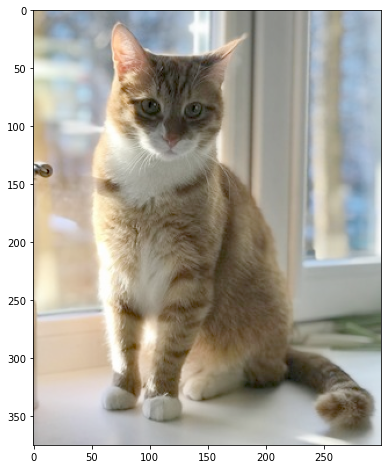

In [3]:
plt.figure(figsize=(8, 8))
plt.imshow(img**0.55)
plt.show()

Степень > 1 - уменьшение яркости

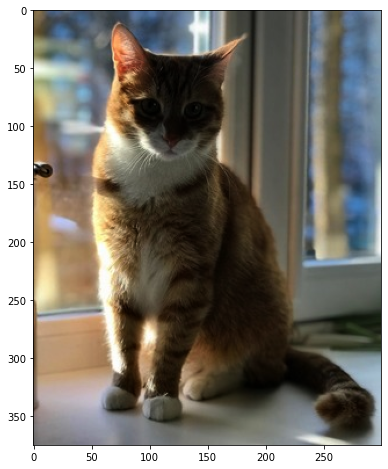

In [4]:
plt.figure(figsize=(8, 8))
plt.imshow(img**1.25)
plt.show()

Свертка

In [5]:
def conv(img, w):
    out_img = np.zeros(
        (img.shape[0] - w.shape[0] + 1,
         img.shape[1] - w.shape[1] + 1,
         img.shape[2]), 
         dtype=np.float32)
    
    for c in range(out_img.shape[2]):
        for i in range(out_img.shape[0]):
            for j in range(out_img.shape[1]):
                x = img[i:i+w.shape[0], j:j+w.shape[1], c]
        
                out_img[i,j,c] = np.sum(w * x)
    
    return out_img

Ядро - гауссиан

In [6]:
win_size = (11, 11)
sigma = 3
w = np.zeros(win_size, dtype=np.float32)
for i in range(w.shape[0]):
    for j in range(w.shape[1]):
        w[i,j] = np.exp(-(i-w.shape[0]//2)**2 / sigma**2 / 2 
                        -(j-w.shape[1]//2)**2 / sigma**2 / 2)
w = w / np.sum(w)

new_img = conv(img, w)

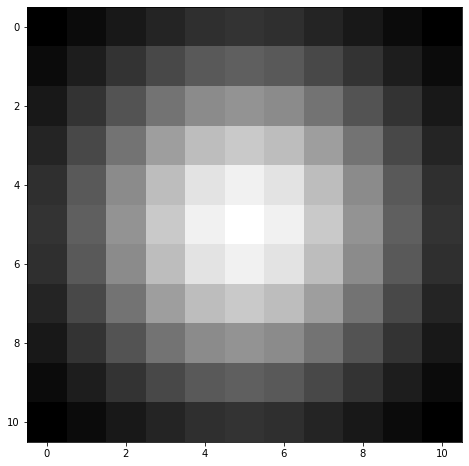

In [7]:
plt.figure(figsize=(8, 8))
plt.imshow(w, cmap='gray')
plt.show()

Результат - размытие по гауссу

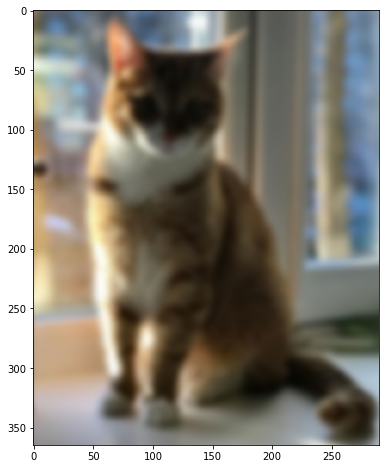

In [8]:
plt.figure(figsize=(8, 8))
plt.imshow(new_img)
plt.show()